In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
ga_curve = pd.read_csv(os.path.join('algo_results','ga_curves_queen_size_100_iteration_5.csv'))
sa_curve = pd.read_csv(os.path.join('algo_results','sa_curves_queen_size_100_iteration_5.csv'))
rhc_curve = pd.read_csv(os.path.join('algo_results','rhc_curves_queen_size_100_iteration_5.csv'))
mimic_curve = pd.read_csv(os.path.join('algo_results','mimic_curves_queen_size_100_iteration_5.csv'))

In [39]:
rhc_curve = pd.read_csv(os.path.join('algo_results','rhc_curves_flip_flop_size_10_iteration_1.csv'))
rhc_curve[(rhc_curve['current_restart']==25) & (rhc_curve['Restarts']==25)]

,Unnamed: 0,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart


In [34]:
def plot_rhc(rhc_curve, x_name='Iteration',y_name='FEvals', axs=None):

        if axs == None:
            _,axs = plt.subplots()
        if y_name == 'FEvals':
            x_name = 'current_restart'
            x = rhc_curve[(rhc_curve['Restarts']==25)]['current_restart']
            y = rhc_curve[(rhc_curve['Restarts']==25)][y_name]
            axs.plot(x,y)
            x = rhc_curve[(rhc_curve['Restarts']==75)]['current_restart']
            y = rhc_curve[(rhc_curve['Restarts']==75)][y_name]
            axs.plot(x,y)
            x = rhc_curve[(rhc_curve['Restarts']==100)]['current_restart']
            y = rhc_curve[(rhc_curve['Restarts']==100)][y_name]    
        else: 
            x = rhc_curve[(rhc_curve['current_restart']==25) & (rhc_curve['Restarts']==25)][x_name]
            y = rhc_curve[(rhc_curve['current_restart']==25) & (rhc_curve['Restarts']==25)][y_name]
            axs.plot(x,y)
            x = rhc_curve[(rhc_curve['current_restart']==75) & (rhc_curve['Restarts']==75)][x_name]
            y = rhc_curve[(rhc_curve['current_restart']==75) & (rhc_curve['Restarts']==75)][y_name]
            axs.plot(x,y)
            x = rhc_curve[(rhc_curve['current_restart']==100) & (rhc_curve['Restarts']==100)][x_name]
            y = rhc_curve[(rhc_curve['current_restart']==100) & (rhc_curve['Restarts']==100)][y_name]
        line = axs.plot(x,y)
        axs.set_xlabel(x_name, fontsize = 15)
        axs.set_ylabel(y_name, fontsize = 15)
        axs.set_title(f"Iteration vs {y_name}", fontsize = 15)
        axs.legend(['restart=25','restart=75','restarts=100'])
        axs.tick_params(axis='both', which='major', labelsize=15)
        axs.tick_params(axis='both', which='minor', labelsize=15)

        return line


In [35]:
def graph_rhc(problem_name='flip_flop'):
    problem_size = [10, 20, 40, 60, 100]
    fig, axs = plt.subplots(nrows=len(problem_size), ncols=1, figsize=(10,15), constrained_layout=True)
    fig.suptitle(f'RHC: {problem_name} problem',fontsize=20)
    count = 1
    # clear subplots
    for ax in axs:
        ax.remove()

    # add subfigure per subplot
    gridspec = axs[0].get_subplotspec().get_gridspec()
    subfigs = [fig.add_subfigure(gs) for gs in gridspec]
    problem_count = 0
    for row, subfig in enumerate(subfigs):
        size = problem_size[problem_count]
        subfig.suptitle(f'Problem Size: {size}', fontsize=15)
        # create 1x3 subplots per subfig
        axs = subfig.subplots(nrows=1, ncols=3)
        rhc_curve = pd.read_csv(os.path.join('algo_results',f'rhc_curves_{problem_name}_size_{size}_iteration_{count}.csv'))
        y_name_lst = ['FEvals', 'Fitness', 'Time']
        name_count = 0
        for col, ax in enumerate(axs):
            
            y_name = y_name_lst[name_count]
            plot_rhc(
                rhc_curve=rhc_curve,y_name=y_name, axs=ax
            )
            ax.set_title(f'{y_name}',fontsize=15)
            name_count = name_count+1
        count = count + 1
        problem_count = problem_count + 1

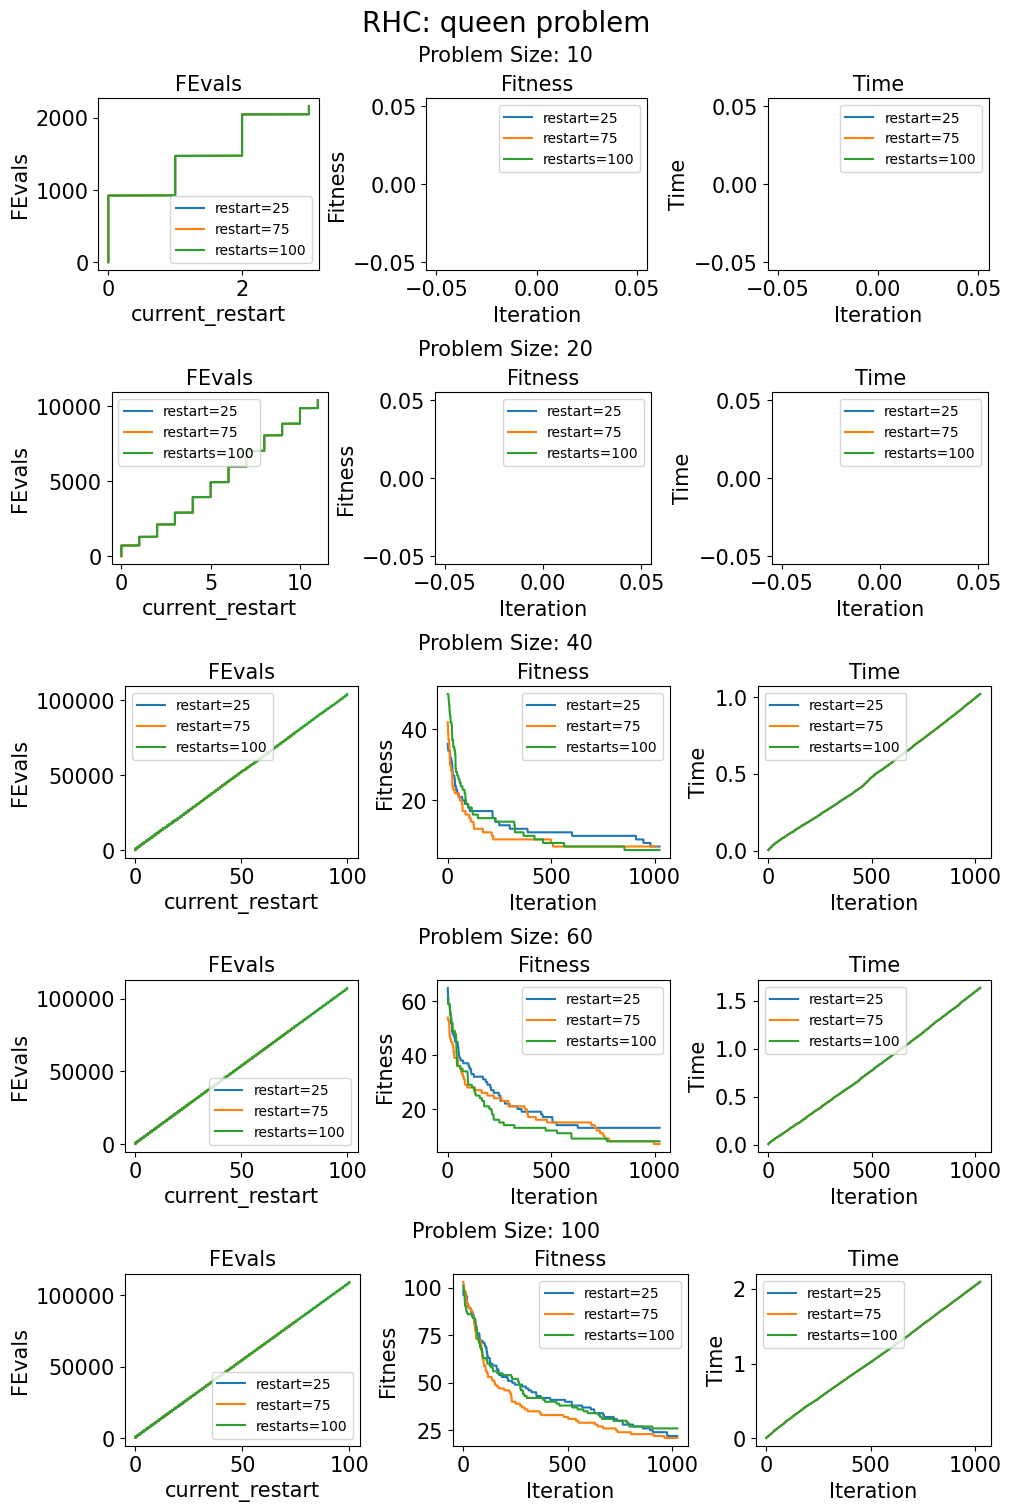

In [ ]:
graph_rhc('flip_flop')

In [44]:
graph_rhc('queen')

In [ ]:
graph_rhc('knap')